# ***Predicting Heart Disease with classification***

We are given a dataset with 14 attributes of patients either experiencing some level of heart disease, or not any heart disease, with the goal being to discover trends in this data that can predict future cardiovascular outcomes, or correctly classify patients without knowledge of their current diagnosis.

**Attribute Information:**

 1. **age** (integer)
 
 
 2. **sex** (binary)
 
 
 3. **cp:** Chest pain type ( 0 - asymptomatic, 1 - atypical angina, 2 - non-anginal pain, or 3 - typical angina ) 
 
 
 4. **trestbps:** resting blood pressure  (constant)
 
 
 5. **chol:** serum cholestoral in mg/dl (constant)
 

 6. **fbs:** fasting blood sugar (> 120 mg/dl or <  120 mg/dl) (binary)
 
 
 7. **restecg:** Resting electrocardiography results (0 - left ventricular hypertrophy, 1 - normal, 2 - ST-T wave abnormality of > 0.05mV) (category)
 
 
 8. **thalach:** Max. heart rate achieved during thalium stress test (constant)
 
 
 9. **exang:** Exercise induced angina (chest pain) (yes or no) (binary)
 
 
 10. **oldpeak:** ST depression induced by exercise relative to rest (constant)

 11. **slope:** Slope of peak exercise stress test (ST) segment (upsloping, flat, or downsloping) (category)
 
 
 12. **Ca:** Number of major vessels colored by fluoroscopy (0-3) (integer)

    Fluoroscopy is used during testing and surgery to detect blood flow through arteries and to view arteries and veins in the head, arms, legs, chest, back or abdomen.
    
 
 13. **thal:** 'Thalium Stress Test Result thal: 1 = fixed defect; 2 = normal; 3 = reversable defect (category)
 
     
 14. **Target:** Heart disease (0 is < 50% narrowing, or 1, > 50%) (binary)
 


Acknowledgements

Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# Goals

Attempt to find trends within this data that can accurately provide clear indications of current heart health.

**Ground Truth**

All patients are scored with a binary variable indicating whether or not they suffer from heart disease according to afore mentioned definition

**Type of Problem**

This is a classification problem, but it can be converted to a linear regression, which will attempt in the future


# Data Cleaning and Visualization

In [1]:
# First look

import pandas as pd
project_path = '/Users/williamstanford/bmme_480_Stanford/bmme_890_project'

# Create a new variable 
# Target/Ca - number of major arteries with > 50% narrowing over total number of arteries for each patient
heartdata = pd.read_csv(project_path+'/heart.csv')
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [124]:
heartdata.shape

(303, 14)

In [125]:
heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Categorical Variables**

While we have many variables that are categorical, they have already been encoded as binary variables, or ordered values that represent each subcategory (sex, cp, fbs, restecg, exang, slope, ca, thal, target). This means we don't necessarily have to do one hot encoding.

**Name Changes**

We will, however, alter the names of the categories to make them more readable

In [2]:
heartdata.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ECG', 'max_HR_achieved',
       'exercise_induced_angina', 'ST_depression', 'ST_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']
heartdata.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_HR_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Missing/Bad data**

Some missing data was filled in with 0's rather than NaN, we will drop those patients

In [3]:
heartdata.drop([49,93,139,164,165,252,282], axis=0)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_HR_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Preparation!
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings('ignore')

In [129]:
heartdata.heart_disease.value_counts()

1    165
0    138
Name: heart_disease, dtype: int64

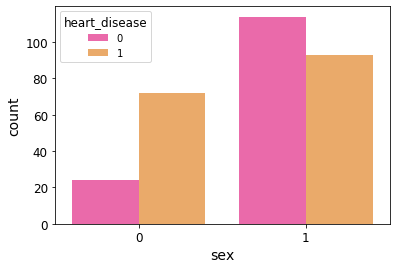

In [130]:
sns.countplot(x='sex',data=heartdata,hue='heart_disease',linewidth=3, palette='spring')

<function matplotlib.pyplot.show(*args, **kw)>

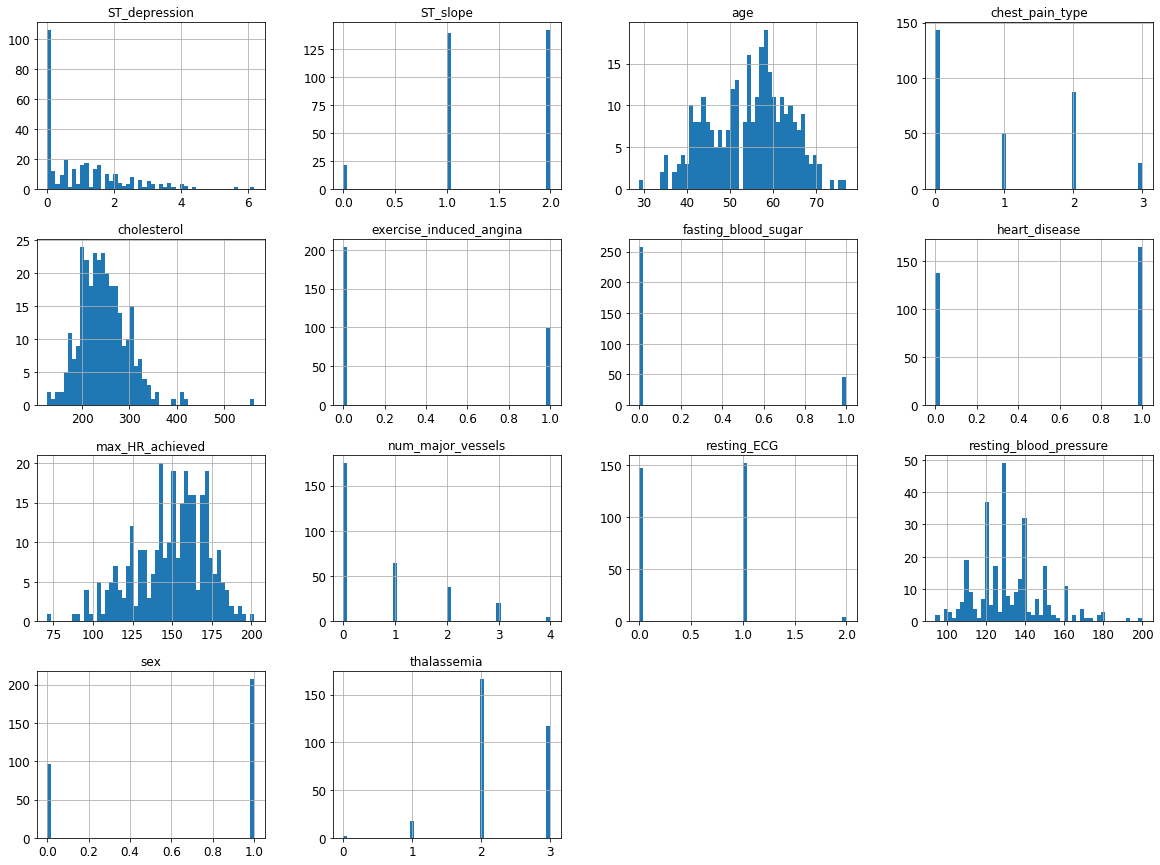

In [131]:
heartdata.hist(bins = 50, figsize = (20,15))
plt.show

In [314]:
heartdata.mean()

age                         54.366337
sex                          0.683168
chest_pain_type              0.966997
resting_blood_pressure     131.623762
cholesterol                246.264026
fasting_blood_sugar          0.148515
resting_ECG                  0.528053
max_HR_achieved            149.646865
exercise_induced_angina      0.326733
ST_depression                1.039604
ST_slope                     1.399340
num_major_vessels            0.729373
thalassemia                  2.313531
heart_disease                0.544554
dtype: float64

In [315]:
heartdata.median()

age                         55.0
sex                          1.0
chest_pain_type              1.0
resting_blood_pressure     130.0
cholesterol                240.0
fasting_blood_sugar          0.0
resting_ECG                  1.0
max_HR_achieved            153.0
exercise_induced_angina      0.0
ST_depression                0.8
ST_slope                     1.0
num_major_vessels            0.0
thalassemia                  2.0
heart_disease                1.0
dtype: float64

Text(0.5, 1.0, '0: No Angina, 1: Angina | 0: No Heart Disease, 1: Heart Disease')

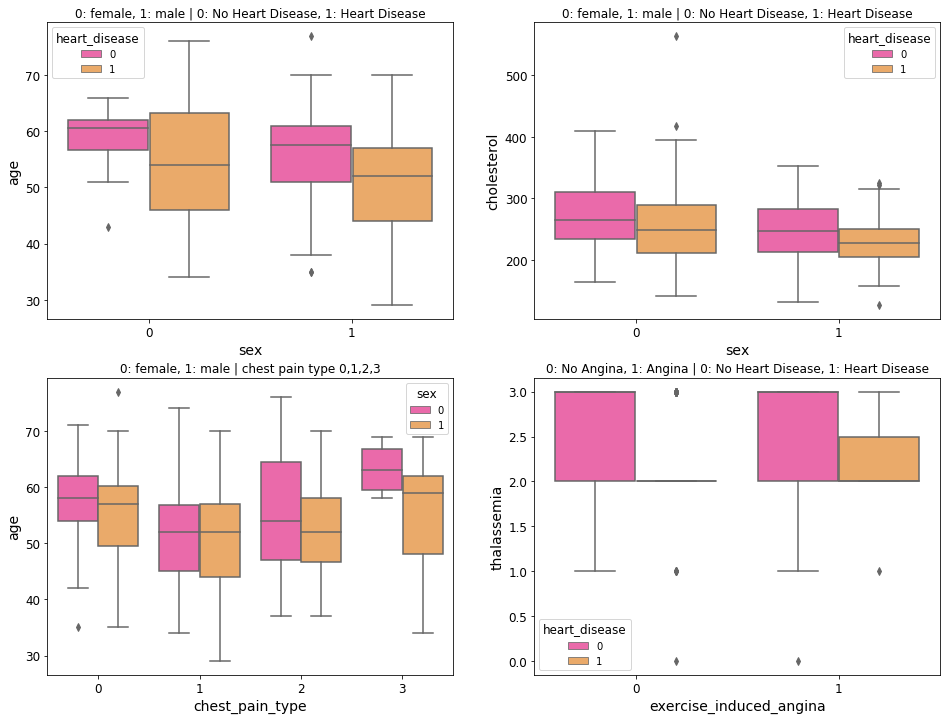

In [132]:
# Some boxplots of characteristics that jump out as potential causes of heart disease

fig,ax=plt.subplots(figsize=(16,12))
plt.subplot(221)
b1=sns.boxplot(x="sex",y="age",hue="heart_disease",data=heartdata,palette="spring")
b1.set_title("0: female, 1: male | 0: No Heart Disease, 1: Heart Disease")


plt.subplot(222)
b2=sns.boxplot(x="sex",y="cholesterol",hue="heart_disease",data=heartdata,palette="spring")
b2.set_title("0: female, 1: male | 0: No Heart Disease, 1: Heart Disease")


plt.subplot(223)
b3=sns.boxplot(x="chest_pain_type",y="age",hue="sex",data=heartdata,palette="spring")
b3.set_title("0: female, 1: male | chest pain type 0,1,2,3")


plt.subplot(224)
b4=sns.boxplot(x="exercise_induced_angina",y="thalassemia",hue="heart_disease",data=heartdata,palette="spring")
b4.set_title("0: No Angina, 1: Angina | 0: No Heart Disease, 1: Heart Disease")

Text(0.5, 1.0, 'Counts of HD based on chest pain type')

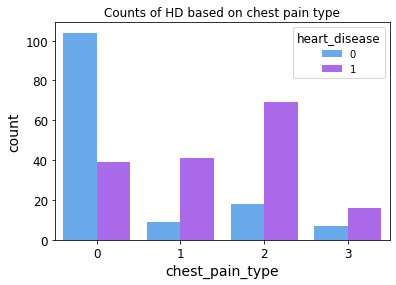

In [331]:
# further exploration of relationship to chest pain

plot = sns.countplot(x='chest_pain_type',data=heartdata, hue='heart_disease', palette='cool',linewidth=3)
plot.set_title('Counts of HD based on chest pain type')

Text(0.5, 1.0, 'Counts of HD vs fluoroscopy colored blood vessels')

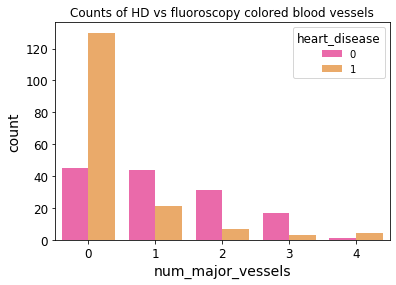

In [134]:
# What about arteries colored by fluoroscopy - a technique commonly used to diagnose heart disease
# with questionable accuracy (30-70%)

plot = sns.countplot(x='num_major_vessels',data=heartdata, hue='heart_disease', palette='spring',linewidth=3)
plot.set_title('Counts of HD vs fluoroscopy colored blood vessels')

In [138]:
# What categories are highly correlated with HD

corr_matrix = heartdata.corr()
corr_matrix["heart_disease"].sort_values(ascending=False)

heart_disease              1.000000
chest_pain_type            0.433798
max_HR_achieved            0.421741
ST_slope                   0.345877
resting_ECG                0.137230
fasting_blood_sugar       -0.028046
cholesterol               -0.085239
resting_blood_pressure    -0.144931
age                       -0.225439
sex                       -0.280937
thalassemia               -0.344029
num_major_vessels         -0.391724
ST_depression             -0.430696
exercise_induced_angina   -0.436757
Name: heart_disease, dtype: float64

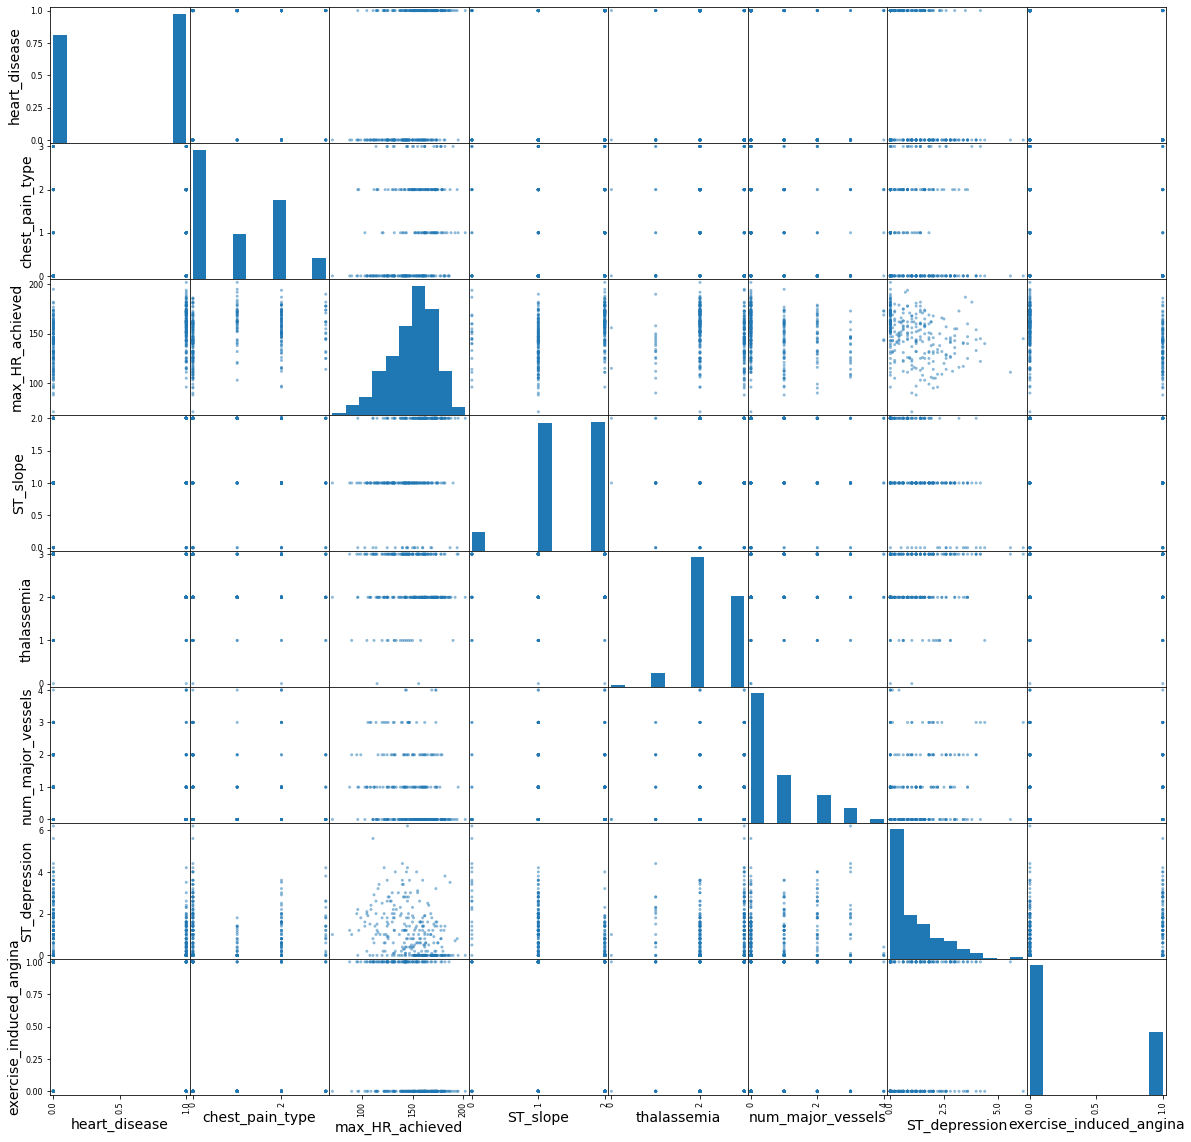

In [139]:
# Scatter matrix of all categories with correlation coefficient greater than .3
# Notice inverse trend in many categories, might be related to potential error in target coding

from pandas.plotting import scatter_matrix

attributes = ["heart_disease", "chest_pain_type", "max_HR_achieved", "ST_slope",
              "thalassemia", "num_major_vessels", "ST_depression","exercise_induced_angina"]
_ = scatter_matrix(heartdata[attributes], figsize=(20, 20))

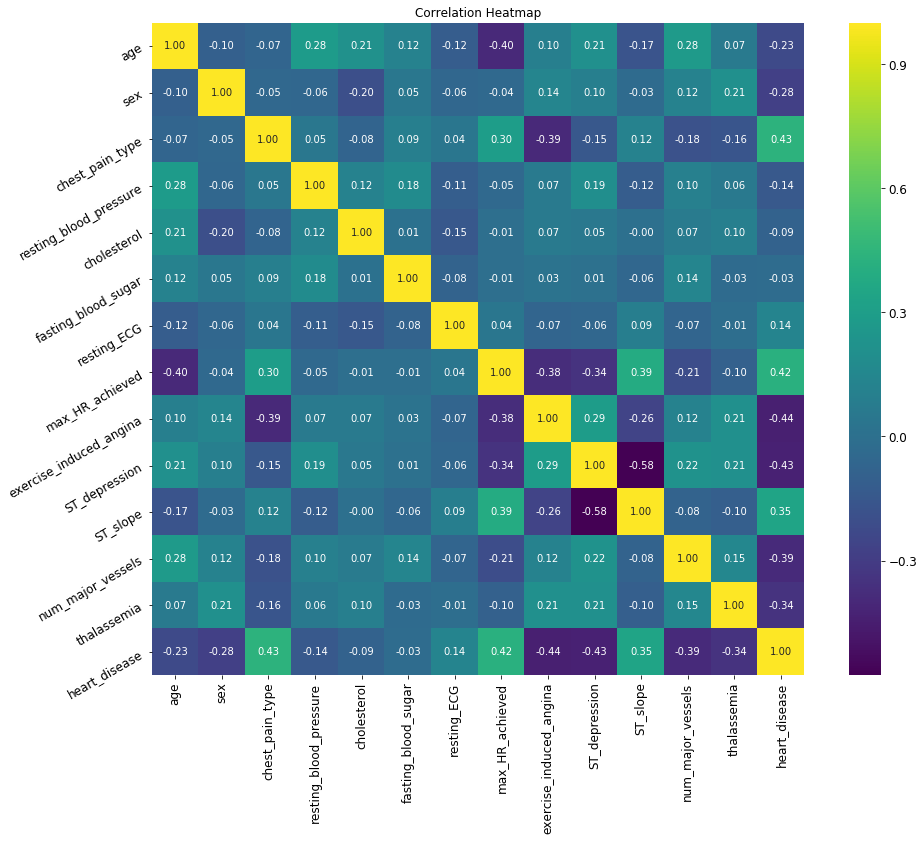

In [316]:
corr = heartdata.corr(method ='pearson')

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white', cmap = 'viridis')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# Preprocessing Pipeline

In [5]:
# Create dataframe of every column except the final  
X=heartdata.iloc[:,:-1]

# Save index and final column (healthy or diseased)
Y=heartdata.iloc[:,-1]

# For later
Z = heartdata

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print (' Length of training set is ' + str(len(X_train)) )
print (' Length of test set is ' + str(len(X_test)) )

 Length of training set is 242
 Length of test set is 61


# Applying Models

**1. SGDClassifier**

In [319]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, l1_ratio = .05)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.05, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [320]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train, cv=5, scoring="accuracy")

array([0.55102041, 0.55102041, 0.65306122, 0.58333333, 0.55319149])

In [321]:
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)
Y_train_pred.mean()

0.5909090909090909

In [322]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, Y_train_pred)


array([[54, 55],
       [45, 88]])

In [323]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision_score(Y_train, Y_train_pred) 

0.6153846153846154

In [324]:
recall_score(Y_train, Y_train_pred)

0.6616541353383458

In [325]:
f1_score(Y_train, Y_train_pred)

0.6376811594202899

In [327]:
Y_scores = cross_val_predict(sgd_clf, X_train, Y_train, cv=3,
                             method="decision_function")

In [328]:
from sklearn.metrics import roc_curve
# receiver operating characteristic curves 

fpr, tpr, thresholds = roc_curve(Y_train, Y_scores)

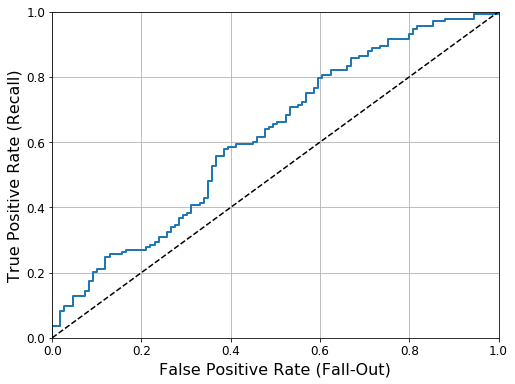

In [329]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.show()

**2. SVC**

In [236]:
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [248]:
Y_pred_clf = svc_clf.predict(X_test)

In [249]:
svc_scores = cross_val_score(svm_clf, X_train, Y_train, cv=10)
svc_scores.mean()

0.5536884057971014

In [252]:
accuracy_score(Y_test, Y_pred_clf)

0.5409836065573771

In [275]:
Y_scores = cross_val_predict(svc_clf, X_train, Y_train, cv=3,
                             method="decision_function")

In [276]:
from sklearn.metrics import roc_curve
# receiver operating characteristic curves 

svr, tps, thresholds = roc_curve(Y_train, Y_scores)

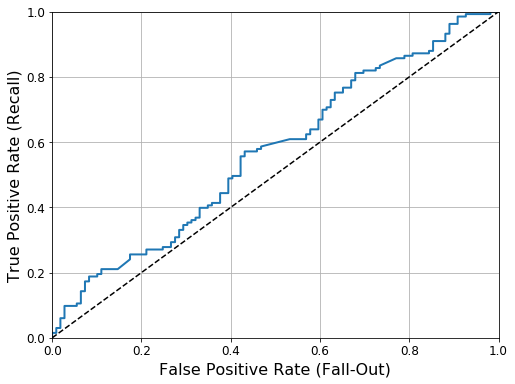

In [277]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(svr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(svr, tps)
plt.show()

**3. RandomForestClassifier**

In [302]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=20, random_state=42)
forest_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [306]:
Y_forest_clf = forest_clf.predict(X_test)
accuracy_score(Y_test, Y_forest_clf)

0.8360655737704918

In [307]:
# Model precision with all categories 

Y_train_pred_forest = cross_val_predict(forest_clf, X_train, Y_train, cv=3)
precision_score(Y_train, Y_train_pred_forest)

0.8062015503875969

In [308]:
recall_score(Y_train, Y_train_pred_forest)

0.7819548872180451

In [309]:
cross_val_score(forest_clf, X_train, Y_train, cv=5, scoring="accuracy").mean()

0.8097463453466492

In [310]:
f1_score(Y_train, Y_train_pred_forest)

0.7938931297709922

In [311]:
y_probas_forest = cross_val_predict(forest_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")

In [312]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
# The roc_curve() function expects labels and scores, but instead of scores you can give it
# class probabilities. Let’s use the positive class’s probability as the score:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,y_scores_forest)

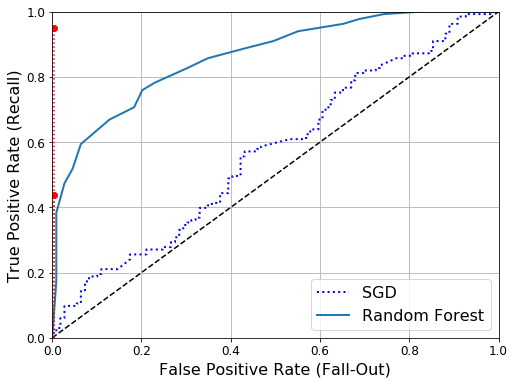

In [313]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Transformer

**Future work**

Try using transformers, one hot encoding for non-binary categorical variables
We may be able to make this a regression problem 
Explore other methods for dealing with categories
Maybe switch to a more interesting dataset

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#num_pipeline = Pipeline([
#        ("select_numeric", DataFrameSelector(["chest_pain_type", "num_major_vessels", "thalassemia"])),
#        ("imputer", SimpleImputer(strategy="median")),
#    ])

In [11]:
#vnum_pipeline.fit_transform(X)

In [12]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["chest_pain_type", "num_major_vessels", "thalassemia"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [17]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("cat_pipeline", cat_pipeline),
    ])

In [18]:
cat_pipeline.fit_transform(X)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [19]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print (' Length of training set is ' + str(len(X_train2)) )
print (' Length of test set is ' + str(len(X_test2)) )

 Length of training set is 242
 Length of test set is 61


In [394]:
forest_clf_2 = RandomForestClassifier(n_estimators=20, random_state=42)
forest_clf_2.fit(X_train2, Y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [395]:
Y_forest_clf_2 = forest_clf_2.predict(X_test2)
accuracy_score(Y_test2, Y_forest_clf_2)

0.8360655737704918

**Current Standing**

SVC < SDGClassifier < RandomForestClassifier


# PART 2

1. K Nearest Neighbor
2. Basic neural network
3. Deep Artificial Neural Networks
4. Dimensionality reduction
5. Convolutional Neural Network?

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, InputLayer
from matplotlib import pyplot as plt

import tensorflow as tf

data_path = '/Users/kierski/Documents/ml_bmme_890/bmme_480_kierski/will_project/bmme_480_Stanford/Class Presentation/heart.csv'

In [2]:
df = pd.read_csv(data_path)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Preprocessing -- One-hot encoding categorical variables, normalizing numeric vars, imputing missing data if present
# Variables to OHE: cp, restecg, slope, thal
# All others are numeric
ohe_col = ['cp','restecg','slope','thal']
cols = list(df.drop(columns=['target']).columns)
num_col = [x for x in cols if x not in ohe_col]


pipe_onehot = make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder())
pipe_num = make_pipeline(SimpleImputer(strategy = 'mean'),MinMaxScaler())

pipe_full = ColumnTransformer([
    ('one_hot', pipe_onehot, ohe_col),
    ('num', pipe_num, num_col)
])

In [4]:
training_label = (df['target'].copy()).values
data_no_label = df.drop(columns=['target'])
print(data_no_label.head(1))
print('\n############## Original data above, transformed data below ##############\n')
x = pipe_full.fit_transform(data_no_label)
print(x[0,:])

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   

   ca  thal  
0   0     1  

############## Original data above, transformed data below ##############

[0.         0.         0.         1.         1.         0.
 0.         1.         0.         0.         0.         1.
 0.         0.         0.70833333 1.         0.48113208 0.24429224
 1.         0.60305344 0.         0.37096774 0.        ]


/anaconda3/envs/bmme890/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
# # Create dataframe of every column except the final  
# X=heartdata.iloc[:,:-1]

# # Save index and final column (healthy or diseased)
# Y=heartdata.iloc[:,-1]

# # For later
# Z = heartdata

# X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_full, X_test, Y_train_full, Y_test = train_test_split(x,training_label,test_size=0.3,
                                                              stratify=training_label,random_state=42)
print('Training data size is: ',X_train_full.shape)
print('Test data size is: ',X_test.shape)

Training data size is:  (212, 23)
Test data size is:  (91, 23)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train_full, Y_train_full)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))

2 NN Score: 72.53%


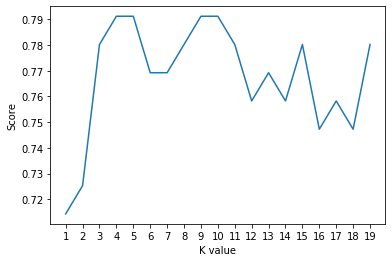

In [11]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_full, Y_train_full)
    scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

### 1. Basic Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_valid, X_train = X_train_full[:121], X_train_full[121:]
y_valid, Y_train = Y_train_full[:121], Y_train_full[121:]

In [ ]:
X_train.shape

In [ ]:
input_shape = X_train.shape[1]

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile( loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history_BNN = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
import pandas as pd

pd.DataFrame(history_BNN.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

### 2. Deep Artificial Neural Network

1. Kernal initializer 
2. Activation function
2. Batch Normalization 
2. Regularization
5. Optimization
6. Learning schedules/rules

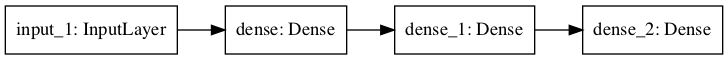

In [33]:
# Setting up the model -- fairly shallow net
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

hidden_layers = 2
neurons_per_layer = 25
n_classes = 1
n_epoch = 100
val_fraction = 0.3
img_size = X_train_full.shape[1:]

model = tf.keras.models.Sequential([
    InputLayer(input_shape=img_size)    
])

for i in range(hidden_layers):
    model.add(Dense(neurons_per_layer, activation='elu', kernel_initializer='he_uniform'))

model.add(Dense(n_classes, activation='sigmoid'))
plot_model(model,rankdir='LR')

In [34]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
adam = tf.keras.optimizers.Adam(learning_rate=3.33e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam,
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

history = model.fit(X_train_full,Y_train_full,epochs=n_epoch,validation_split=val_fraction,callbacks=[es],verbose=0)
model.evaluate(X_test,Y_test)

91/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4843587331719451, 0.73626375]

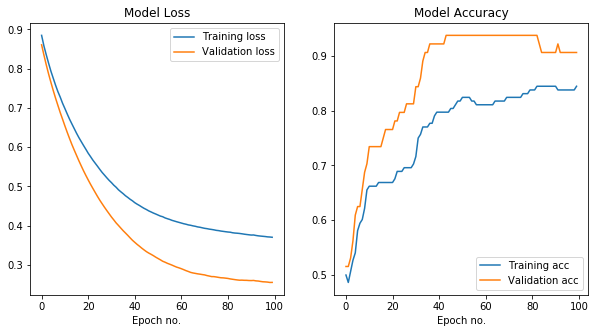

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel('Epoch no.')
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.legend(['Training acc','Validation acc'])
plt.xlabel('Epoch no.')
plt.title('Model Accuracy')
plt.show()

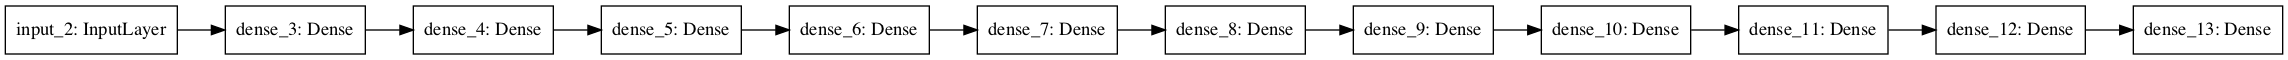

In [36]:
# Setting up the model -- deeper net
tf.random.set_seed(42)
np.random.seed(42)

hidden_layers = 10
neurons_per_layer = 25
n_classes = 1
n_epoch = 100
val_fraction = 0.3
img_size = X_train_full.shape[1:]

model_deep = tf.keras.models.Sequential([
    InputLayer(input_shape=img_size)    
])

for i in range(hidden_layers):
    model_deep.add(Dense(neurons_per_layer, activation='elu', kernel_initializer='he_uniform'))

model_deep.add(Dense(n_classes, activation='sigmoid'))
plot_model(model_deep,rankdir='LR')

In [37]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
adam = tf.keras.optimizers.Adam(learning_rate=3.33e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_deep.compile(optimizer=adam,
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

history_deep = model_deep.fit(X_train_full,Y_train_full,epochs=n_epoch,validation_split=val_fraction,callbacks=[es],verbose=0)
model_deep.evaluate(X_test,Y_test)

Epoch 00049: early stopping
91/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5274278272639265, 0.7802198]

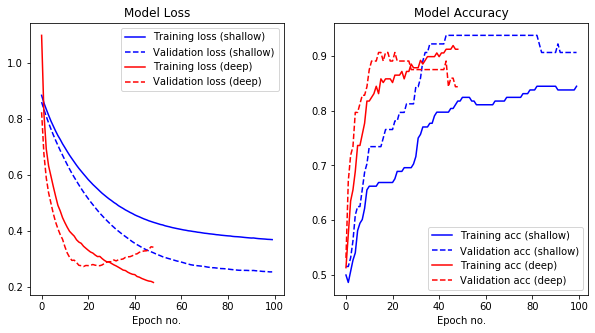

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],linestyle='-',color='b')
plt.plot(history.history['val_loss'],linestyle='--',color='b')
plt.plot(history_deep.history['loss'],linestyle='-',color='r')
plt.plot(history_deep.history['val_loss'],linestyle='--',color='r')
plt.legend(['Training loss (shallow)','Validation loss (shallow)','Training loss (deep)','Validation loss (deep)'])
plt.xlabel('Epoch no.')
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(history.history['binary_accuracy'],linestyle='-',color='b')
plt.plot(history.history['val_binary_accuracy'],linestyle='--',color='b')
plt.plot(history_deep.history['binary_accuracy'],linestyle='-',color='r')
plt.plot(history_deep.history['val_binary_accuracy'],linestyle='--',color='r')
plt.legend(['Training acc (shallow)','Validation acc (shallow)','Training acc (deep)','Validation acc (deep)'])
plt.xlabel('Epoch no.')
plt.title('Model Accuracy')
plt.show()

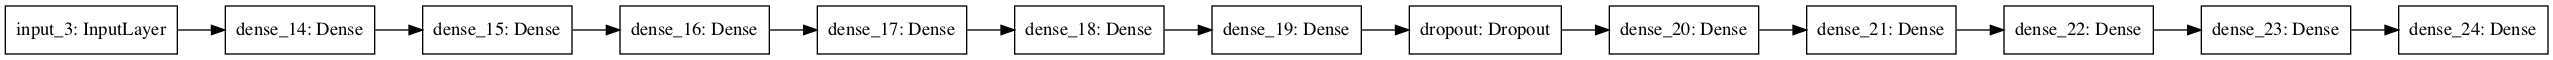

In [39]:
# Setting up the model -- deeper net, with dropout
tf.random.set_seed(42)
np.random.seed(42)

hidden_layers = 10
neurons_per_layer = 25
dropout_fraction = 0.15
n_classes = 1
n_epoch = 100
val_fraction = 0.3
img_size = X_train_full.shape[1:]

model_do = tf.keras.models.Sequential([
    InputLayer(input_shape=img_size)    
])

for i in range(hidden_layers):
    model_do.add(Dense(neurons_per_layer, activation='elu', kernel_initializer='he_uniform'))
    if i==round(hidden_layers/2):
        model_do.add(Dropout(dropout_fraction))

model_do.add(Dense(n_classes, activation='sigmoid'))
plot_model(model_do,rankdir='LR')

In [40]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
adam = tf.keras.optimizers.Adam(learning_rate=3.33e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_do.compile(optimizer=adam,
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

history_do = model_do.fit(X_train_full,Y_train_full,epochs=n_epoch,validation_split=val_fraction,callbacks=[es],verbose=0)
model_do.evaluate(X_test,Y_test)

Epoch 00052: early stopping
91/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5285660395255456, 0.7802198]

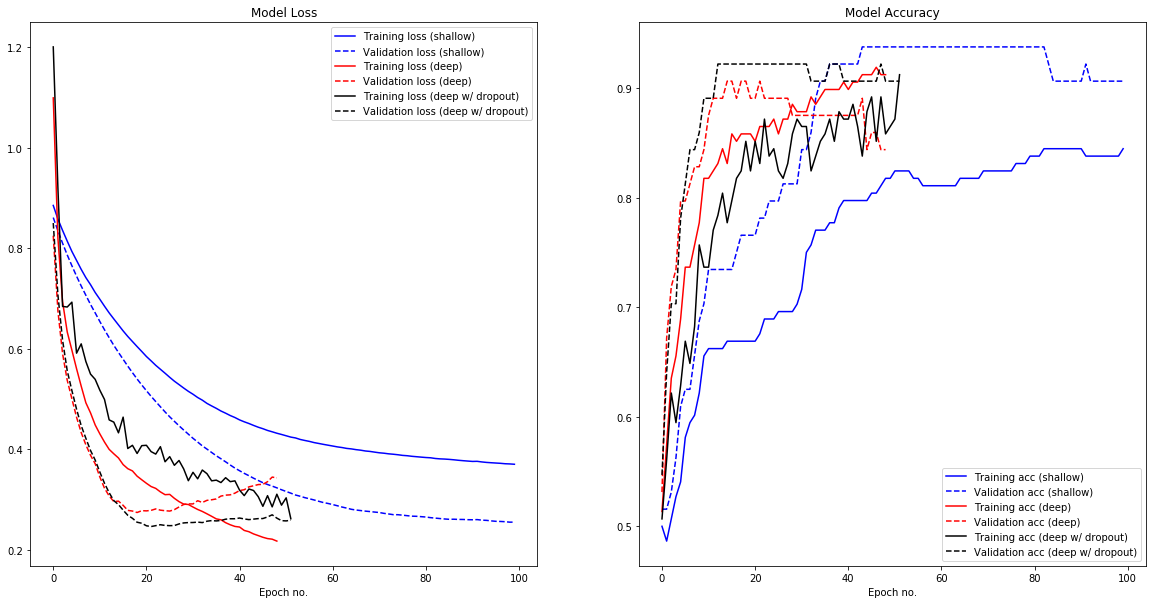

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],linestyle='-',color='b')
plt.plot(history.history['val_loss'],linestyle='--',color='b')
plt.plot(history_deep.history['loss'],linestyle='-',color='r')
plt.plot(history_deep.history['val_loss'],linestyle='--',color='r')
plt.plot(history_do.history['loss'],linestyle='-',color='k')
plt.plot(history_do.history['val_loss'],linestyle='--',color='k')
plt.legend(['Training loss (shallow)','Validation loss (shallow)','Training loss (deep)','Validation loss (deep)',
            'Training loss (deep w/ dropout)','Validation loss (deep w/ dropout)'])
plt.xlabel('Epoch no.')
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(history.history['binary_accuracy'],linestyle='-',color='b')
plt.plot(history.history['val_binary_accuracy'],linestyle='--',color='b')
plt.plot(history_deep.history['binary_accuracy'],linestyle='-',color='r')
plt.plot(history_deep.history['val_binary_accuracy'],linestyle='--',color='r')
plt.plot(history_do.history['binary_accuracy'],linestyle='-',color='k')
plt.plot(history_do.history['val_binary_accuracy'],linestyle='--',color='k')
plt.legend(['Training acc (shallow)','Validation acc (shallow)','Training acc (deep)','Validation acc (deep)',
            'Training acc (deep w/ dropout)','Validation acc (deep w/ dropout)'])
plt.xlabel('Epoch no.')
plt.title('Model Accuracy')
plt.show()

### Dimensionality Reduction 

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

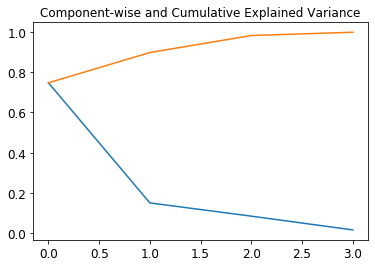

In [48]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

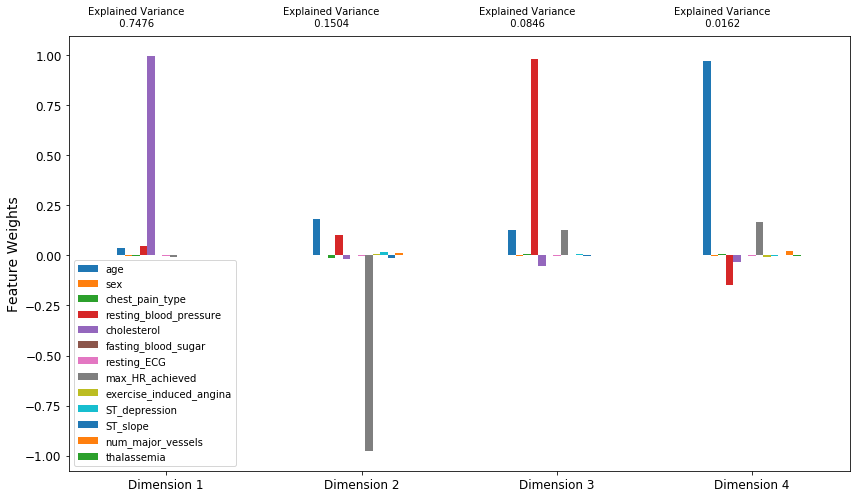

In [46]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X, pca)

In [49]:
X_reduced.shape

(303, 4)

In [50]:
Xr_train_full, Xr_test, Yr_train_full, Yr_test = train_test_split(X_reduced, Y, test_size = 0.2, random_state = 42)

In [53]:
Xr_valid, Xr_train = Xr_train_full[:121], Xr_train_full[121:]
yr_valid, Yr_train = Yr_train_full[:121], Yr_train_full[121:]

In [55]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=4),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile( loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history_reduced = model.fit(Xr_train, Yr_train, epochs=30,
                    validation_data=(Xr_valid, yr_valid))

In [ ]:
import pandas as pd

pd.DataFrame(history_BNN.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(Xr_test, Yr_test)

### 4. Convolutional Neural Network - Maybe?

### 5. Recurrent Neural Network - Probably not